In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 4장 일변수함수의 미분 

## 4.1 변화율 

In [ ]:
## 4.2 미분에 관한 정리 

In [ ]:
# 이분법을 이용해 방정식의 근을 구하는 함수
def root_bisection(f, a, b, tolerance=1e-6) -> float:
    while abs(a - b) > tolerance:
        c = (a + b)/2
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    return (a + b)/2

In [ ]:
# 뉴턴법을 이용한 근의 근사
def root_newton(f, fp, a, tolerance=1e-6) -> float:
    while abs(f(a)) > tolerance:
        a = a - f(a)/fp(a)
    return a

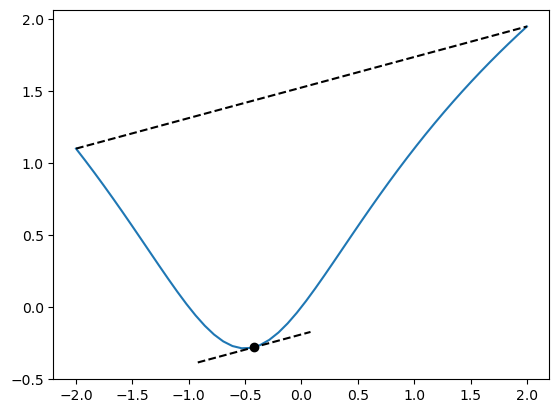

In [7]:
# 평균값 정리를 함수 (4.25)에 적용하고 도식화
f = lambda x: np.log(x**2 + x + 1 )                                     # 원함수
fp = lambda x: (2*x + 1) / (x**2 + x + 1)                               # 도함수
fpp = lambda x: (2*(x**2 + x + 1) - (2*x + 1)**2) / (x**2 + x + 1)**2   # 2계도함수

x = np.linspace(-2, 2)
plt.plot(x, f(x))                        # 함수의 그래프
m =(f(2) -f(-2)) /(2 -(-2))              # 평균변화율 계산
plt.plot([-2, 2], [f(-2), f(2)], 'k--')  # 평균변화율을 기울기로 도식화 
p =lambda x: fp(x) - m                   # 근을 구하는 함수
r =root_newton(p, fpp, 0)                # 뉴턴법으로 근을 계산
x =np.linspace(r-.5, r+.5)
plt.plot(x, m*(x-r)+f(r), 'k--')
plt.plot(r, f(r), 'ko')

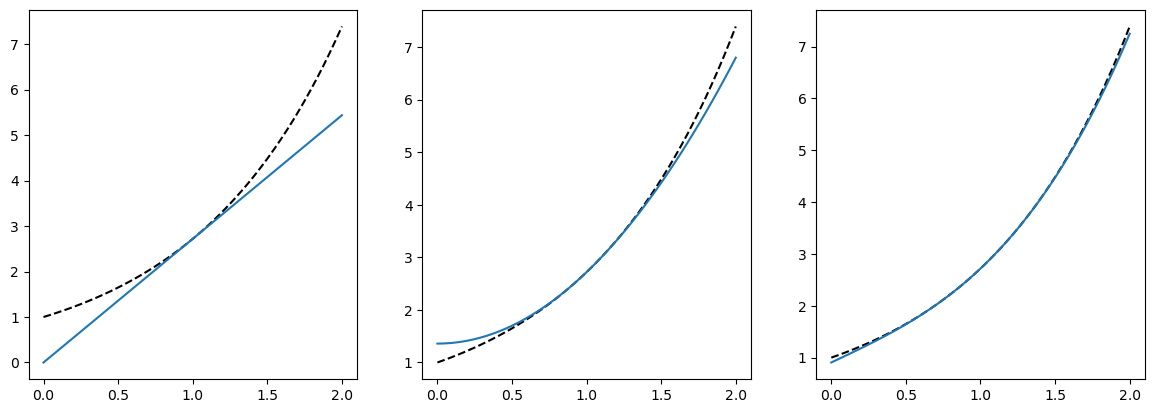

In [9]:
# x=1의 근방에서 지수함수를 근사하는 다항식의 그래프
fig, ax = plt.subplots(1, 3, figsize=plt.figaspect(1/3))

p = [lambda x: np.exp(1) + np.exp(1)*(x-1)]
p.append(lambda x: p[0](x) + np.exp(1)/2*(x-1)**2)
p.append(lambda x: p[1](x) + np.exp(1)/6*(x-1)**3)

x = np.linspace(0, 2)
for i in range(3):
    ax[i].plot(x, np.exp(x), 'k--')
    ax[i].plot(x, p[i](x))

In [12]:
# 테일러 다항식의 구현
def talyor_cosine(n:int, c, x:float) -> float:
    s = 1/np.sqrt(2)
    f = 1/np.sqrt(2)
    for i in range(n):
        sign = 1 if i%4 == 0 or i%4 == 3 else -1
        f *= (x-c)/(i+1)
        s += sign*f
    return s

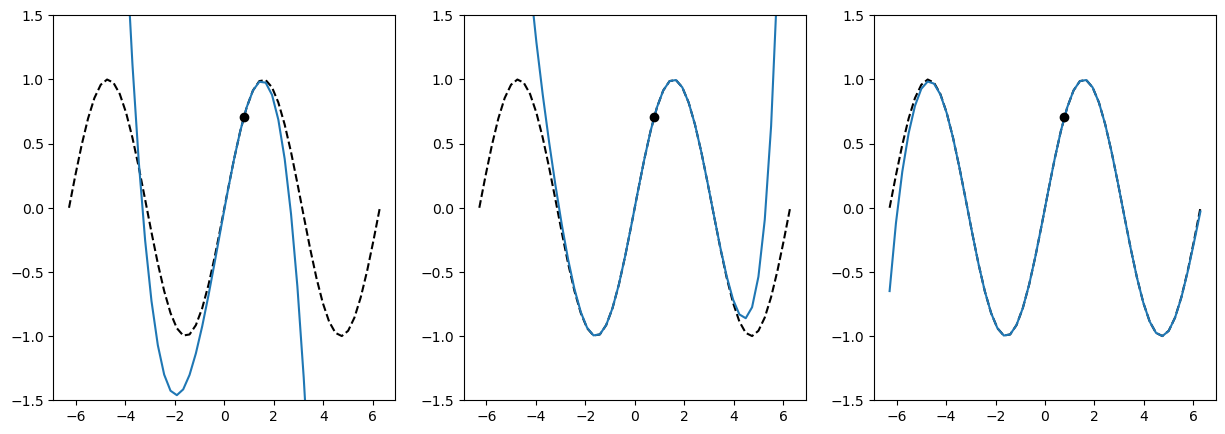

In [16]:
# 테일러 다항식과 원함수의 그래프 비교
c = np.pi/4
x = np.linspace(-2*np.pi, 2*np.pi)

deg = [3, 9, 15]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(deg)):
    ax[i].plot(x, np.sin(x), 'k--')
    ax[i].plot(x, talyor_cosine(deg[i], c, x))
    ax[i].plot(c, np.sin(c), 'ko')
    ax[i].set_ylim([-1.5, 1.5])

In [21]:
# x=1에서의 테일러 급수의 구현
def taylor_log(n, x):
    s = (x-1)
    f = (x-1)
    for i in range(2, n+1):
        sign = 1 if i%2 == 1 else -1
        f *= (x-1)*(i-1)/i
        s += sign*f
    return s

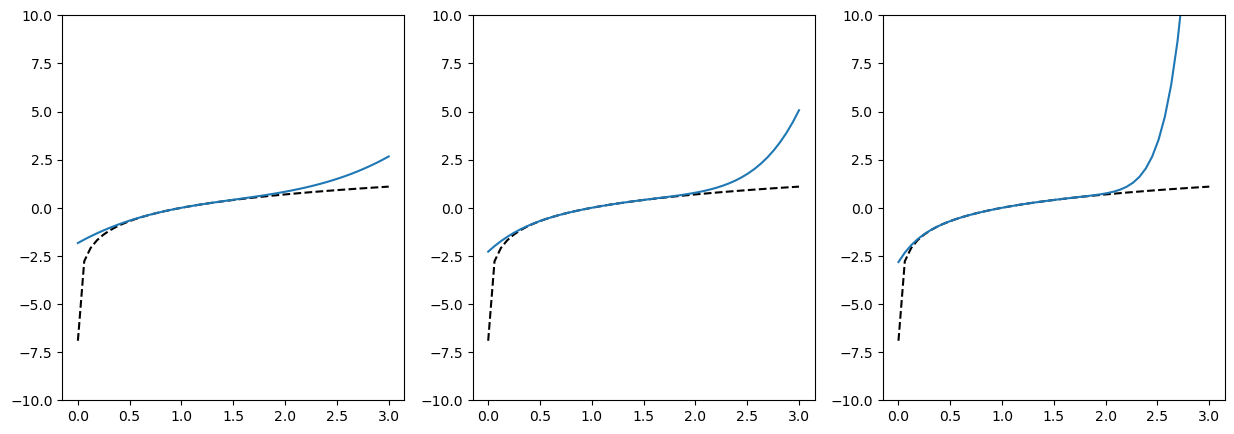

In [22]:
# 테일러 다항식과 원함수의 그래프
c = 1 
x = np.linspace(0.001, 3)

deg = [3, 5, 9]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(deg)):
    ax[i].plot(x, np.log(x), 'k--')
    ax[i].plot(x, taylor_log(deg[i], x))
    ax[i].set_ylim([-10, 10])

## 4.3 일변수함수의 미분의 응용 

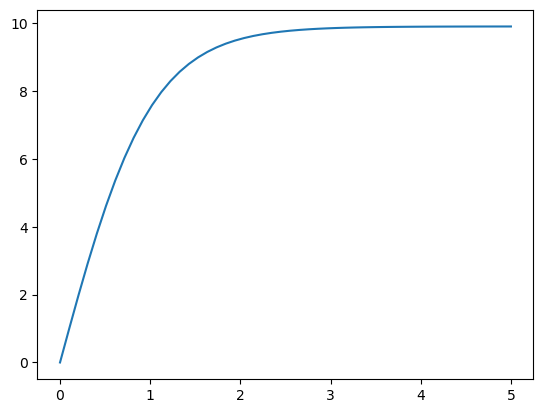

In [24]:
f = lambda x: np.sqrt(98)*(np.exp(2*np.sqrt(.98)*x)-1)/(np.exp(2*np.sqrt(.98)*x)+1)
x = np.linspace(0, 5)
plt.plot(x, f(x))

In [25]:
# 용수철을 그리기 위해 필요한 상수
coil_num = 10 
coil_radius = 0.5 
coil_tip = .5 

In [29]:
# 주어진 시작점과 끝점을 잇는 코일의 모양을 배열로 반환
def coil(p, q: np.array) -> list[np.array, np.array]:
    v = q - p 
    l = np.sqrt(v.dot(v))
    v = v / l
    vp = np.array([-v[1], v[0]])
    
    t = np.linspace(0, 1, 201)
    cp = coil_radius * v[:, np.newaxis] * np.cos(np.pi - np.pi*(2*coil_num+1)*t) + \
         coil_radius * vp[:, np.newaxis] * np.sin(np.pi - np.pi*(2*coil_num+1)*t)
    ll = l - 2*coil_tip - 2*coil_radius
    if ll < 0: 
        ll = 0
    t = np.linspace(0, ll, 201)
    oc = p[:, None] + (coil_tip + coil_radius) * v[:, None] + t*v[:, None]

    return np.hstack((p[:, np.newaxis], oc+cp, q[:, np.newaxis]))

In [30]:
# 오일러 방법을 구현
def euler(f, x, y0: np.array):
    y = np.empty((len(y0), len(x)))
    y[:, 0] = y0
    for i in range(1, len(x)):
        y[:, i] = y[:, i-1] + f(x[i-1], y[:, i-1])*(x[i]-x[i-1])    
    return y

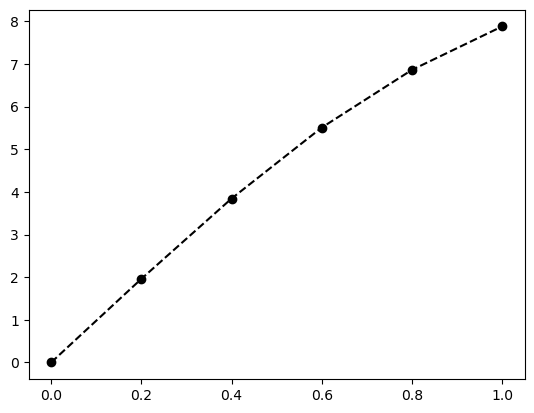

In [32]:
# 오일러 방법을 이용해 해의 그래프 그리기
x = np.linspace(0, 1, 6)
f = lambda x, y: np.array([9.8 - 0.1*y**2])
y = euler(f, x, np.array([0]))
plt.plot(x, y[0], 'ko--')

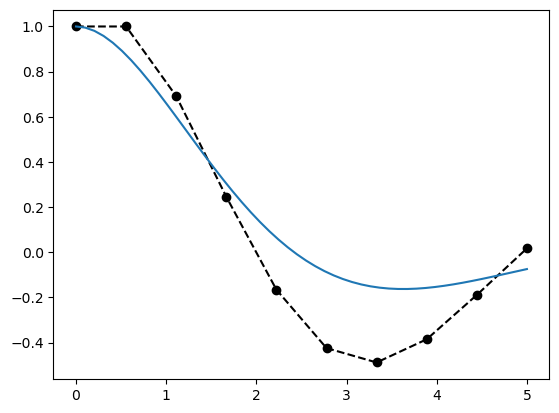

In [34]:
# 2계미분방정식의 수치적 해 구하기
x = np.linspace(0, 5, 10)
f = lambda x, y: np.array([y[1], -y[0]-y[1]])
y = euler(f, x, np.array([1, 0]))
plt.plot(x, y[0], 'ko--')
x = np.linspace(0, 5)
y = np.exp(-x/2)*(np.cos(np.sqrt(3)/2*x) + np.sin(np.sqrt(3)/2*x)/np.sqrt(3))
plt.plot(x, y)

## 4.4 프로젝트: 용수철 애니메이션 만들기 

In [35]:
!pip install ImageMagic    

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


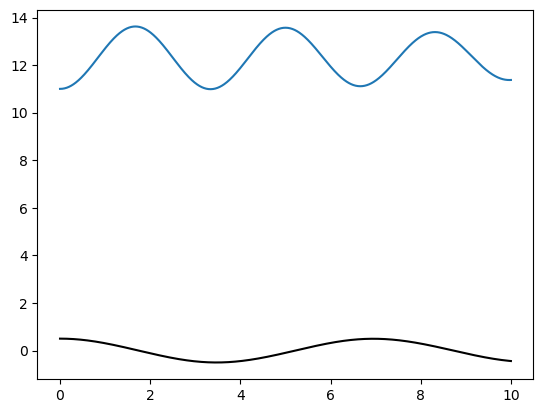

In [37]:
# 오일러 방법을 이용한 1계연립미분방정식의 해법
m, k, l0 = 1, 4, 10
f = lambda x, y: np.array([y[1], 
                           -m*9.8*np.sin(y[0])/y[2], 
                           y[3], 
                           9.8*np.cos(y[0])-(k/m)*(y[2]-l0)])
x = np.linspace(0, 10, 1000)
y = euler(f, x, np.array([.5, 0, 11, 0]))
plt.plot(x, y[0], 'k')
plt.plot(x, y[2])

MovieWriter imagemagick unavailable; using Pillow instead.


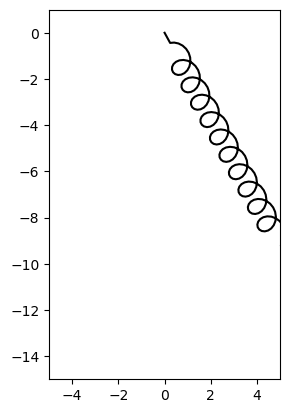

In [42]:
# 용수철 진자의 움직임 시뮬레이션
fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-15, 1)
ax.set_aspect('equal')
spring, = ax.plot([], [], 'k')

def update(i):
    start = np.array([0, 0])
    # 시뮬레이션을 10배 빠르게 진행시키기 위해 i*10을 사용
    end = np.array([y[2][i*10]*np.sin(y[0][i*10]), -y[2][i*10]*np.cos(y[0][i*10])])
    spring.set_data(*coil(start, end))
    return spring,

import matplotlib.animation as ani
# 애니메이션의 총 프레임 수는 frames=100으로 설정
a = ani.FuncAnimation(fig, update, frames=100, interval=100)
a.save('4-1.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; using Pillow instead.


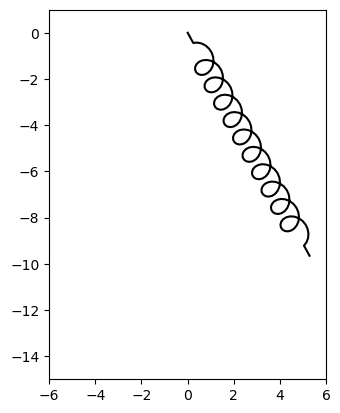

In [45]:
fig, ax = plt.subplots()
ax.set_xlim(-6, 6)
ax.set_ylim(-15, 1)
ax.set_aspect('equal')
spring, = ax.plot([], [], 'k')

def update(i):
    start = np.array([0, 0])
    end = np.array([y[2][i*10]*np.sin(y[0][i*10]), -y[2][i]*np.cos(y[0][i*10])])
    spring.set_data(*coil(start, end))
    return spring,

import matplotlib.animation as ani
# 애니메이션의 총 프레임 수는 frames=100으로 설정
a = ani.FuncAnimation(fig, update, frames=100, interval=100)
a.save('4-1.gif', writer='imagemagick')